In [1]:
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
byte_distribution_no_zero = np.load('byte_prob_distr_no_zero.npy')

In [21]:
PX100W_csv = byte_distribution_no_zero[83] # Single row corresponds to PX100W.csv
PS86_map_png = byte_distribution_no_zero[868] # Corresponds to PS86_MAP.png
PDF_heron = byte_distribution_no_zero[922] # Corresponds to 09FS20091009_heron_1.pdf

print(PX100W_csv.size)
print(PS86_map_png.size)
print(PDF_heron.size)



255
255
255


In [22]:
def generate_plot(distr, plot_title, top_n=10):
    ind = np.argpartition(distr, -top_n)[-top_n:]
    ind = ind[np.argsort(distr[ind])]
    
    plt.bar(range(ind.size), distr[ind], align='center', tick_label=ind)
    plt.xlabel('Byte Value (in decimal)')
    plt.ylabel('Proportion of file')
    plt.title(plot_title)
    plt.show()




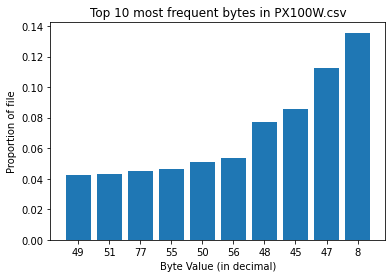

In [20]:
generate_plot(PX100W_csv, 'Top 10 most frequent bytes in PX100W.csv')

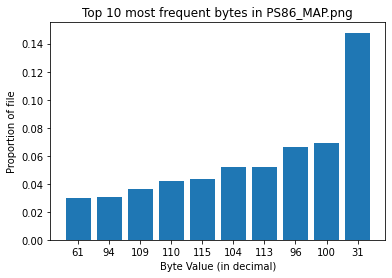

In [23]:
generate_plot(PS86_map_png, 'Top 10 most frequent bytes in PS86_MAP.png')

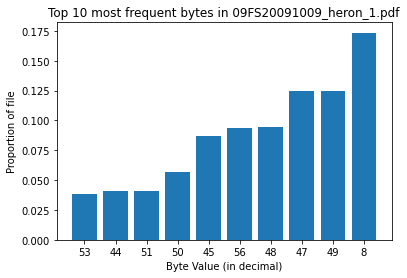

In [24]:
generate_plot(PDF_heron, 'Top 10 most frequent bytes in 09FS20091009_heron_1.pdf')

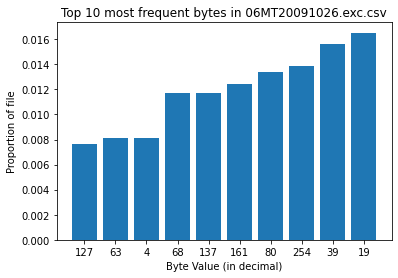

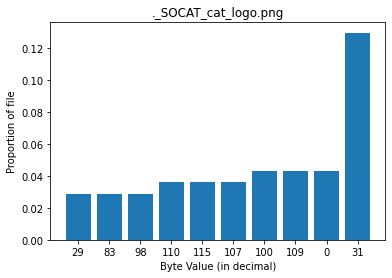

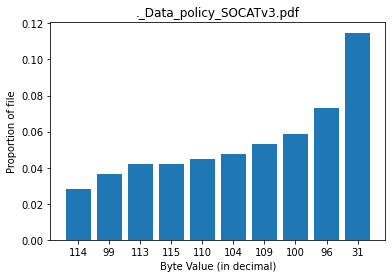

In [25]:
# Doing some more validation with other files of same types

MT_csv = byte_distribution_no_zero[1852] # Corresponds to 06MT20091026.exc.csv
SOCAT_png = byte_distribution_no_zero[6034] # Corresponds to ._SOCAT_cat_logo.png
SOCAT_pdf = byte_distribution_no_zero[6041] # Corresponds to ._Data_policy_SOCATv3.pdf

generate_plot(MT_csv, 'Top 10 most frequent bytes in 06MT20091026.exc.csv')
generate_plot(SOCAT_png, '._SOCAT_cat_logo.png')
generate_plot(SOCAT_pdf, '._Data_policy_SOCATv3.pdf')


### I noticed that tabs and spaces were pretty frequent as the most common which doesn't help distinguish file types so I remove them

In [3]:
byte_distr_filtered = np.load('byte_distr_filtered_real.npy')

In [4]:
PX100W_csv_f = byte_distr_filtered[83] # Single row corresponds to PX100W.csv
PS86_map_png_f = byte_distr_filtered[868] # Corresponds to PS86_MAP.png
PDF_heron_f = byte_distr_filtered[922] # Corresponds to 09FS20091009_heron_1.pdf

MT_csv_f = byte_distr_filtered[1852] # Corresponds to 06MT20091026.exc.csv
SOCAT_png_f = byte_distr_filtered[6034] # Corresponds to ._SOCAT_cat_logo.png
SOCAT_pdf_f = byte_distr_filtered[6041] # Corresponds to ._Data_policy_SOCATv3.pdf

In [5]:
def generate_plot_filtered(distr, plot_title, top_n=10):
    ind = np.argpartition(distr, -top_n)[-top_n:]
    ind = ind[np.argsort(distr[ind])]

    labels = ind.copy()
    for i in range(len(ind)):
        if ind[i] >= 0 and ind[i] <= 7:
            labels[i] += 1
        elif ind[i] >= 8 and ind[i] <= 29:
            labels[i] += 2
        else:
            labels[i] += 3


    plt.bar(range(ind.size), distr[ind], align='center', tick_label=labels)
    plt.xlabel('Byte Value (in decimal)')
    plt.ylabel('Proportion of file')
    plt.title(plot_title)
    plt.show()

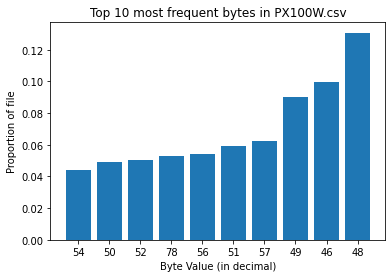

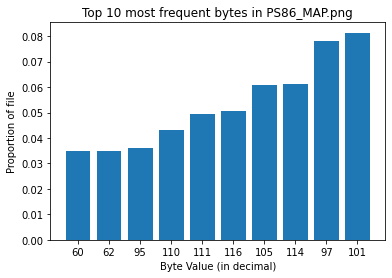

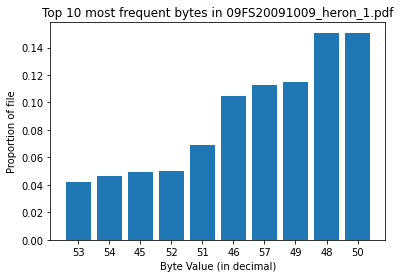

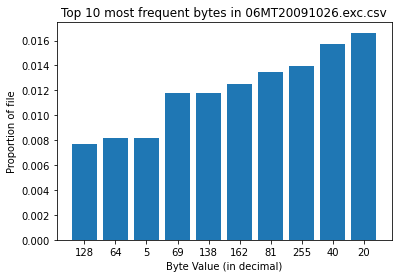

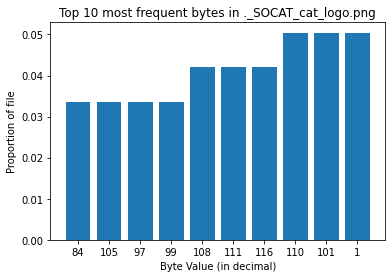

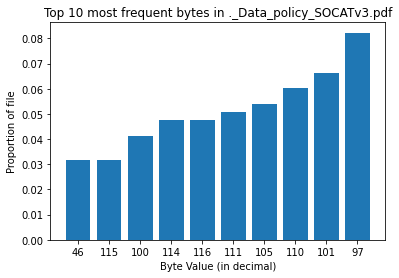

In [6]:
generate_plot_filtered(PX100W_csv_f, 'Top 10 most frequent bytes in PX100W.csv')
generate_plot_filtered(PS86_map_png_f, 'Top 10 most frequent bytes in PS86_MAP.png')
generate_plot_filtered(PDF_heron_f, 'Top 10 most frequent bytes in 09FS20091009_heron_1.pdf')

generate_plot_filtered(MT_csv_f, 'Top 10 most frequent bytes in 06MT20091026.exc.csv')
generate_plot_filtered(SOCAT_png_f, 'Top 10 most frequent bytes in ._SOCAT_cat_logo.png')
generate_plot_filtered(SOCAT_pdf_f, 'Top 10 most frequent bytes in ._Data_policy_SOCATv3.pdf')

